# Random forest

In [59]:
import pandas as pd

df = pd.read_csv("../../data/heart.csv", index_col=0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [61]:
df_no_nulls = df.dropna()
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [62]:
df_no_nulls["AHD"].value_counts()

AHD
No     160
Yes    137
Name: count, dtype: int64

In [63]:
df_dummies = pd.get_dummies(df_no_nulls, drop_first=True)
df_dummies.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False


## Split data

In [64]:
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False
2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False
3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True
4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False
5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False


In [65]:
y.head()

1    False
2     True
3     True
4    False
5    False
Name: AHD_Yes, dtype: bool

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((198, 16), (99, 16))

## Model training

- note no feature scaling for random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([False,  True, False,  True, False, False,  True,  True,  True,
       False])

In [68]:
y_test[:10].values

array([False,  True, False,  True, False, False, False, False,  True,
       False])

## Evaluation

              precision    recall  f1-score   support

       False       0.81      0.87      0.84        53
        True       0.83      0.76      0.80        46

    accuracy                           0.82        99
   macro avg       0.82      0.81      0.82        99
weighted avg       0.82      0.82      0.82        99



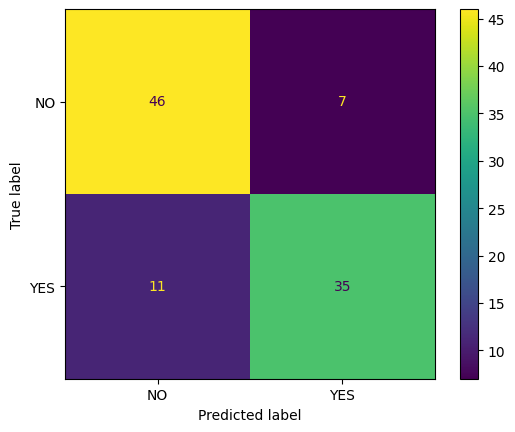

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["NO", "YES"]).plot()

## Feature importance

In [70]:
model.feature_importances_

array([0.08771239, 0.03251508, 0.0756289 , 0.09517285, 0.00946386,
       0.01945305, 0.12924983, 0.03351552, 0.10182802, 0.0220535 ,
       0.16578112, 0.04795376, 0.01004734, 0.01332134, 0.08105366,
       0.07524978])

In [71]:
X.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable'],
      dtype='object')

In [72]:
feature_importance = pd.DataFrame([X.columns, model.feature_importances_])
feature_importance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,0.087712,0.032515,0.075629,0.095173,0.009464,0.019453,0.12925,0.033516,0.101828,0.022053,0.165781,0.047954,0.010047,0.013321,0.081054,0.07525


In [73]:
feature_importance = feature_importance.T
feature_importance.columns = ["Feature", "Importance"]
feature_importance

,Feature,Importance
0,Age,0.087712
1,Sex,0.032515
2,RestBP,0.075629
3,Chol,0.095173
4,Fbs,0.009464
5,RestECG,0.019453
6,MaxHR,0.12925
7,ExAng,0.033516
8,Oldpeak,0.101828
9,Slope,0.022053


In [74]:
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance
10,Ca,0.165781
6,MaxHR,0.12925
8,Oldpeak,0.101828
3,Chol,0.095173
0,Age,0.087712
14,Thal_normal,0.081054
2,RestBP,0.075629
15,Thal_reversable,0.07525
11,ChestPain_nonanginal,0.047954
7,ExAng,0.033516


In [78]:
feature_importance["Importance"].sum()

np.float64(1.0)

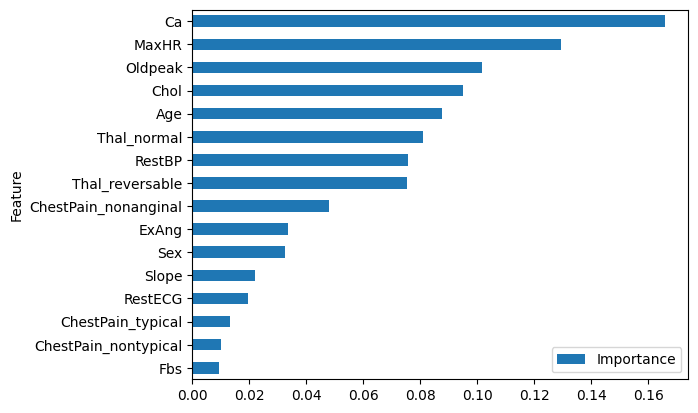

In [77]:
ax = feature_importance.plot(y="Importance", x="Feature", kind="barh")
ax.invert_yaxis()